In [9]:
from hyperbolicity.utils import construct_weighted_matrix
import numpy as np
import torch
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
import pickle
from scipy.spatial.distance import squareform

In [10]:
with open('/share/home/houedry/projects/DifferentiableHyperbolicity/hyperbolicity/datasets/D_zeisel.pkl', 'rb') as f:
    distances = torch.tensor(pickle.load(f))

In [11]:
distances

tensor([[0.0000, 0.1809, 0.1488,  ..., 0.4502, 0.5441, 0.5408],
        [0.1809, 0.0000, 0.1612,  ..., 0.4579, 0.5316, 0.5485],
        [0.1488, 0.1612, 0.0000,  ..., 0.4291, 0.5197, 0.5161],
        ...,
        [0.4502, 0.4579, 0.4291,  ..., 0.0000, 0.5341, 0.5790],
        [0.5441, 0.5316, 0.5197,  ..., 0.5341, 0.0000, 0.5448],
        [0.5408, 0.5485, 0.5161,  ..., 0.5790, 0.5448, 0.0000]],
       dtype=torch.float64)

In [8]:
data = torch.load('/share/home/houedry/projects/DifferentiableHyperbolicity/hyperbolicity/expes/launch_files/results_expes/D_zeisel_2025-05-13_20-29-46/lr_0.001_dr_0.1_sd_10.0_epoch_1000_batch_32_n_batches_3000.pt')
best_weights = data['weights']
print(data['duration'])
num_nodes = distances.shape[0]
edges = torch.triu_indices(num_nodes, num_nodes, offset=1)
distance_optimized = construct_weighted_matrix(best_weights, num_nodes, edges)


5664.401666879654


NameError: name 'distances' is not defined

In [13]:
def clustering_accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm) 
    return cm[row_ind, col_ind].sum() / np.sum(cm)

In [6]:
import pandas as pd
label_map = {"Health": 0, "Irritable Bowel Syndrome": 1}
label_df = pd.read_csv('/share/home/houedry/projects/DifferentiableHyperbolicity/hyperbolicity/datasets/microbiote_labels.csv', header=None)
binary_labels = label_df[1].map(label_map).values[1:]

In [14]:
from scGeneFit.functions import *
[X, Y, names]= load_example_data("zeisel")
N,d=X.shape
print(X.shape, Y.shape)
Y=Y-1 # to start from 0

print('nb classes level 0:',len(np.unique(Y[0])))
#print('nb classes level 1:',len(np.unique(Y[1])))

(3005, 4000) (2, 3005)
nb classes level 0: 7


In [15]:
Z1 = linkage(squareform(distances), method='ward')
cluster_labels1 = fcluster(Z1, t=7, criterion='maxclust')-1 
print(clustering_accuracy(Y[0], cluster_labels1))

0.6169717138103161


In [19]:
Z1 = linkage(squareform(distance_optimized), method='ward')
cluster_labels1 = fcluster(Z1, t=7, criterion='maxclust')-1
print(clustering_accuracy(Y[0], cluster_labels1))

0.2958402662229617


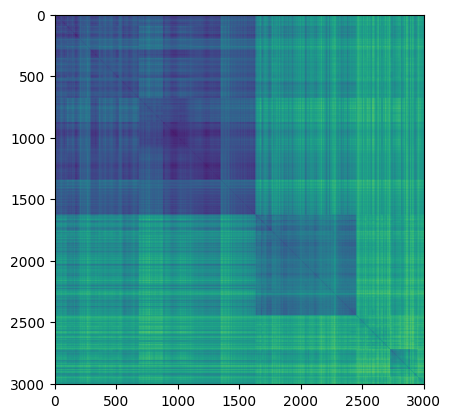

In [21]:
plt.imshow(distances)

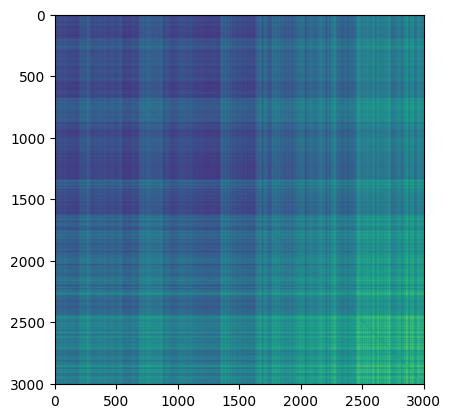

In [22]:
plt.imshow(distance_optimized)